In [18]:
using Plots
using StatsBase
using DataFrames
using GLM

# Strong Form

In [19]:
#N = 10; 
#h = 1/N;
#xstart = -0. 
#xend = 1.
#x = Vector(xstart:h:xend);
nelements = 100; nnodes = nelements+1; h = 1/nelements
x = Vector(0:h:1);

In [20]:
# define the so-called source function 
function strong_form(x)
    
    # Case 1
    return x^4/12-x/12+1/2
    
    # Case 2
    #return x^4-2*x^3+(3/2)*x^2-x/2+1/16
    
end 
f = strong_form.(x);

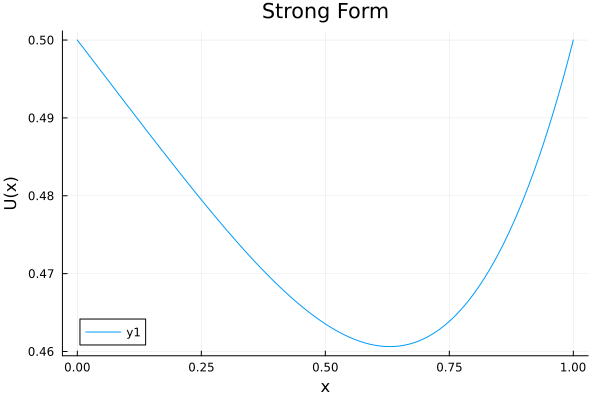

In [21]:
plot(x,f)
title!("Strong Form")
xlabel!("x")
ylabel!("U(x)")

# Weak form

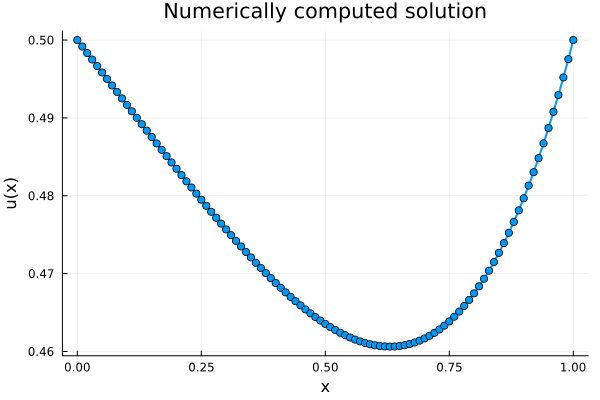

In [22]:
#..construct the mesh: see before 
nelements = 100; nnodes = nelements+1; h = 1/nelements
x = Vector(0:h:1)

function weak_form(x, nelements, nnodes)
    #..Mesh with points and edges 
    #..point holds the coordinates of the left and right node of the element
    #..edges holds the global indices of the left and right node of the element
    points = collect( [x[i], x[i+1]] for i in 1:nelements) 
    edges = collect( [i, i+1] for i in 1:nelements) 
    
    #..Set the source 
    
    # Case 1
    fsource(x) = x*x
    
    
    # Case 2
    #fsource(x) = 12*(x-0.5)^2
    
    
    #..Initialize local and global matrix and right-hand side value 
    floc = zeros(Float64,2, 1)
    Aloc = zeros(Float64,2,2)
    A = zeros(Float64,nnodes, nnodes)
    f = zeros(Float64,nnodes)  
    
    #..Perform loop over elements and assemble global matrix and vector 
    for i=1:nelements 
    
      xl, xr = points[i,:][1]
      floc = -(xr-xl)/2 * [fsource(xl), fsource(xr)]
      Aloc = (1/(xr-xl))*[1 -1; -1 1]
    
      for j=1:2 
        f[edges[i][j]] += floc[j]
        for k =1:2 
          A[edges[i][j], edges[i][k]] += Aloc[j,k]
        end 
      end 
    
    end
    
    #..handle the boundary conditions in the matrix and right-hand side vector 
    
    # Case 1
    A[1,1] = 1;     A[1,2] = 0;        f[1]   = 1/2
    A[end,end-1]=0; A[end,end] = 1;    f[end] = 1/2
    
    # Case 2
    #A[1,1] = 1;     A[1,2] = 0;        f[1]   = 1/16
    #A[end,end-1]=0; A[end,end] = 1;    f[end] = 1/16
    
    #..solve the linear system
    u = A \ f
    return u
end


u = weak_form(x, nelements, nnodes)    
#..plot the solution  
p1=plot(x,u,shape=:circle,lw=2,legend=false)
xlabel!("x") 
ylabel!("u(x)")
title!("Numerically computed solution")

# Convergence

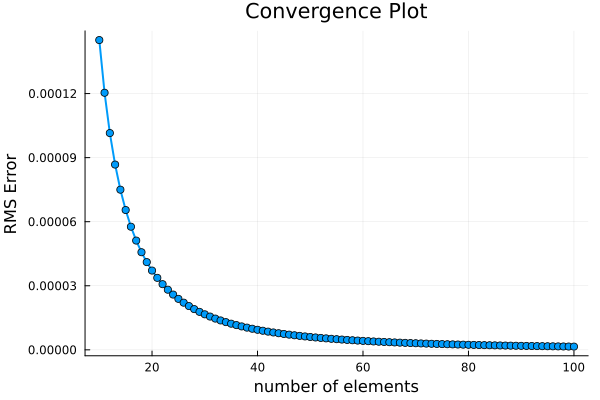

In [23]:
rmse_array = Vector{Float64}()
for nelements = 10:100
    h = 1/nelements;
    nnodes = nelements+1
    x = Vector(0:h:1);
    f = strong_form.(x);
    u = weak_form(x, nelements, nnodes);
    rmse = rmsd(u, f; normalize=false);
    append!(rmse_array, rmse);
end
x = Vector(10:100);
p3=plot(x,rmse_array,shape=:circle,lw=2,legend=false)
title!("Convergence Plot")
xlabel!("number of elements")
ylabel!("RMS Error")

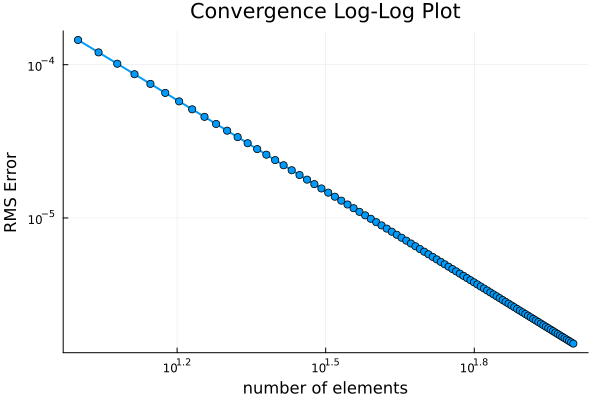

In [24]:
rmse_array = Vector{Float64}()
for nelements = 10:100
    h = 1/nelements;
    nnodes = nelements+1
    x = Vector(0:h:1);
    f = strong_form.(x);
    u = weak_form(x, nelements, nnodes);
    rmse = rmsd(u, f; normalize=false);
    append!(rmse_array, rmse);
end
x = Vector(10:100);
p3=plot(x,rmse_array,shape=:circle,lw=2,legend=false, xaxis=:log, yaxis=:log)
title!("Convergence Log-Log Plot")
xlabel!("number of elements")
ylabel!("RMS Error")

In [25]:
# Extract the slope from the coefficients
y2 = log.(rmse_array)[end]
y1 = log.(rmse_array)[1]
x2 = log.(x)[end]
x1 = log.(x)[1]
slope = (y2-y1)/(x2-x1)

# Display the slope
println("Slope: $slope")

Slope: -1.981442643888628


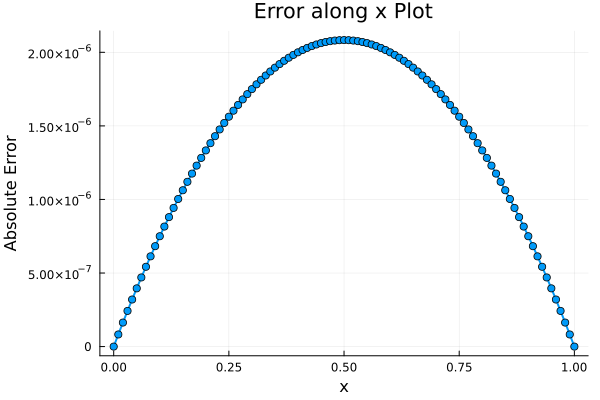

In [28]:
nelements = 100
error_array = Vector{Float64}()
h = 1/nelements;
nnodes = nelements+1
x = Vector(0:h:1);
for i = 1:nelements+1
    f = strong_form.(x);
    u = weak_form(x, nelements, nnodes);
    error = abs(u[i]-f[i])
    append!(error_array, error);
end

p3=plot(x,error_array,shape=:circle,lw=2,legend=false)
title!("Error along x Plot")
xlabel!("x")
ylabel!("Absolute Error")